In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import JSON
from json import JSONEncoder, loads
class MyEncoder(JSONEncoder):
        def default(self, o):
            try:
                return o.as_dict()
            except:
                try:
                    return o.__dict__
                except:
                    return str(o)
show_json = lambda x : display(JSON(loads(MyEncoder().encode(x))))
from building import *
from io_f import *
from matplotlib import pyplot as plt

In [44]:
import torch
import torch.nn.functional as F

def magic_combine(x, dim_begin, dim_end):
    combined_shape = list(x.shape[:dim_begin]) + [-1] + list(x.shape[dim_end:])
    print(combined_shape)
    return x.view(combined_shape)

a = torch.zeros(40,100,2)
b = a.view(40, -1)
print(b.size())

torch.Size([40, 200])


In [25]:
data = read_data_file("/home/lik/Documents/indoor-location-data/test/00ff0c9a71cc37a2ebdd0f05.txt", test_mode=True)
test_data = data.get_test_data("5da1389e4db8ce0c98bd0547", sensor_names=['magn', 'acce', 'gyro'])
test_data.shape


(46, 1426)

In [30]:
data = read_data_file("/home/lik/Documents/indoor-location-data/train/5da1389e4db8ce0c98bd0547/F1/5dd77ff39191710006b565fb.txt", test_mode=False)
train_in, train_out = data.get_training_data(building_id="5da1389e4db8ce0c98bd0547", use_avg=True, sensor_names=['magn', 'acce', 'gyro'])
train_in.shape


(8, 1426)

In [17]:
positions = data.get_positions_at_measured_times(mt)
positions_avg = data.get_positions_at_measured_times(mt_avg)

In [24]:
rr = data.get_interpolated_sensor_data(mt.keys(), sensor_names=['magn', 'acce', 'gyro'])
rr.shape

(40, 10)

In [25]:
wifi_data.shape

(40, 1472)

In [26]:
vec_data = np.concatenate([wifi_data, rr], axis=1)
vec_data.shape

(40, 1482)

In [27]:
positions.shape

(40, 3)

In [ ]:
positions[:,]

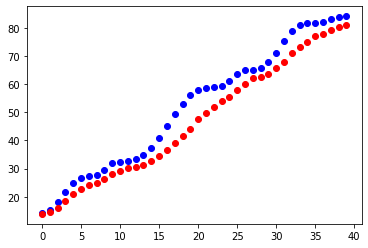

In [9]:
plt.plot(positions[:,1], 'bo')
plt.plot(positions_avg[:,1], 'ro')


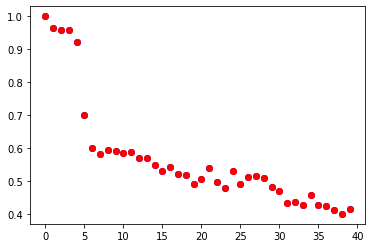

In [11]:
aaa = wifi_data[0, :]
for i in range(40):
    bbb = wifi_data[i, :]
    pp = np.dot(bbb, aaa) / np.sqrt(np.dot(bbb, bbb) * np.dot(aaa, aaa))
    plt.plot(i, pp, 'bo')
aaa = wifi_data_avg[0, :]
for i in range(40):
    bbb = wifi_data[i, :]
    pp = np.dot(bbb, aaa) / np.sqrt(np.dot(bbb, bbb) * np.dot(aaa, aaa))
    plt.plot(i, pp, 'ro')

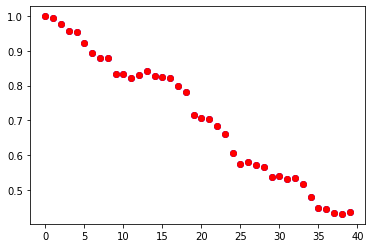

In [6]:
aaa = wifi_data[0, :, 0]
for i in range(40):
    bbb = wifi_data[i, :, 0]
    pp = np.dot(bbb, aaa) / np.sqrt(np.dot(bbb, bbb) * np.dot(aaa, aaa))
    plt.plot(i, pp, 'bo')
aaa = wifi_data_avg[0, :, 0]
for i in range(40):
    bbb = wifi_data[i, :, 0]
    pp = np.dot(bbb, aaa) / np.sqrt(np.dot(bbb, bbb) * np.dot(aaa, aaa))
    plt.plot(i, pp, 'ro')

In [98]:
aaa = ww[0, :, 0]
for i in range(40):
    bbb = ww[i, :, 0]
    print(np.dot(bbb, aaa) / np.sqrt(np.dot(bbb, bbb) * np.dot(aaa, aaa)), )

1.0
0.9938500532127005
0.978767993884705
0.9587618655063453
0.9532674829286986
0.9237170258225313
0.8941331295148014
0.8799019855895781
0.8799019855895781
0.8349038963431852
0.8328244313549668
0.8226552535203866
0.8314109932105399
0.8416431559227396
0.8264771721766018
0.8246385110065656
0.822812066879325
0.7984528049424274
0.7809746397355056
0.7159533568949971
0.7074868439827007
0.7044040979720602
0.6840684215976556
0.66019277149843
0.6064172948423149
0.5747998636078122
0.5810957782830982
0.5716940984161544
0.5667010412256424
0.5378861108990537
0.5402196841590235
0.5314685429335632
0.5326127176549453
0.5172350789865017
0.47770404550544315
0.44727550642923636
0.4448867987191959
0.43335320547819484
0.4303349533131265
0.4355197117867786


In [94]:
ww.shape

(40, 736, 4)

In [111]:
# wifi data:

"""
report_time: 
[
    [frequency, wait_time], <- specific index from ssid->index lookup table
    [frequency, wait_time],
    ...
]
"""
pass

In [103]:
ss = {dd[0] for dd in data.wifi}
len(ss)


42

In [104]:
from collections import defaultdict
# dictionary of time
wifi_fingerprint = defaultdict(lambda [])

SyntaxError: invalid syntax (<ipython-input-104-12da305591f5>, line 3)

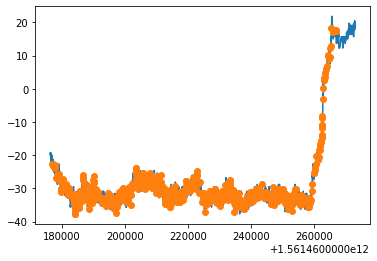

In [112]:
arr = np.array(data.magn)
plt.plot(arr[:, 0], arr[:, 1])
wifi_d = np.interp(t, arr[:, 0], arr[:, 1])
plt.plot(t[::20], wifi_d[::20], 'o')


In [16]:
t = np.array([t0 for t0,_,_,_,_ in data.wifi])

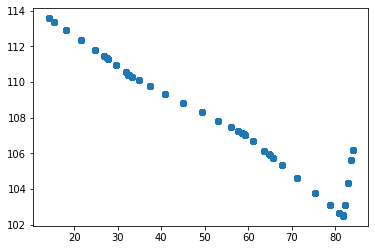

In [17]:
tt, x, y = get_pos_by_time(t, data.waypoint)
plt.plot(x,y, 'o')

(array([ 363.,  468.,  630.,  574.,  566.,  754.,  939., 1309., 2625.,
        7941.]),
 array([-30170. , -27183.7, -24197.4, -21211.1, -18224.8, -15238.5,
        -12252.2,  -9265.9,  -6279.6,  -3293.3,   -307. ]),
 <BarContainer object of 10 artists>)

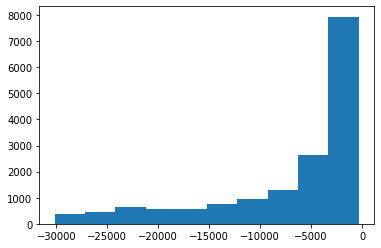

In [21]:
diffs = []
for t1, _, _, _, t2 in data.wifi:
    diffs.append(t2 - t1)
plt.hist(diffs)

In [320]:
t = np.linspace(1578462611392, 1578462638947, 30)
tt, x, y = get_pos_by_time(t, data.waypoint)

<ipython-input-318-3806b0d9d3ca>:15: RuntimeWarning: divide by zero encountered in true_divide
  f1, f2 = 1/f1**2, 1/f2**2
<ipython-input-318-3806b0d9d3ca>:16: RuntimeWarning: invalid value encountered in true_divide
  f1, f2 = f1/(f1 + f2), f2/(f1 + f2)


In [312]:
len(tt)

22

In [313]:
tt[0]

1578462618993.3794

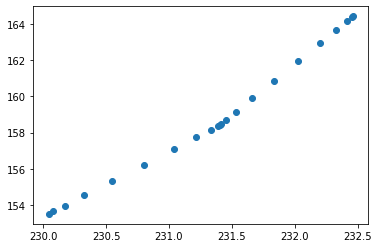

In [314]:
plt.plot(x,y, 'o')

In [9]:
data = read_data_file("/home/lik/Documents/indoor-location-data/test/00ff0c9a71cc37a2ebdd0f05.txt")
data.waypoint

[]

# Train a network to read a file and figure out which building you are in

In [ ]:
len()B

In [11]:
from torch import nn
def get_common_wifi_vec():
    """
    read a 
    """
for ib, db in BUILDING_INFO.items():
    common_ssids = set(db['wifi_ssids']) & ssids_test
    

2
5
1
3
6
4
3
4
3
2
3
4
1
3
4
3
5
4
2
5
3
6
1
3
3
7
1
3
2
4
3
3
2
6
4
1
5
2
2
1
6
3
2
3
5
2
2
58
3
3
3
4
3
3
7
2
2
4
5
3
1
4
4
5
2
1
5
3
4
3
4
2
4
1
2
4
1
2
4
2
1
2
2
3
1
3
5
1
2
5
2
3
3
4
3
2
4
2
4
2
6
1
4
1
2
1
4
2
3
3
1
2
3
4
4
1
5
3
6
6
6
4
2
1
5
8
3
2
5
3
2
2
3
2
4
4
1
4
4
4
4
3
5
2
4
5
7
1
1
6
1
3
6
4
5
2
4
1
2
6
4
3
1
4
4
10
1
1
2
4
2
3
3
3
2
2
3
3
1
3
5
1
3
7
4
4
4
2
4
3
2
0
2
6
3
1


In [4]:
from glob import glob 

In [5]:
s_floors = set()
building = dict() # key building number keys

for ibuild, ifold in enumerate(glob(KAGGLE_TRAIN_DIR+"/*")):
    d = dict(folder=ifold, floor_dirs=dict())
    for fl_dir in glob(d['folder']+"/*"):
        fl = fl_dir.split('/')[-1]
        if fl not in FLOOR_MAP.keys():
            break
        s_floors.add(fl)
        d["floor_dirs"][FLOOR_MAP[fl]] = fl_dir
    else:
        building[ibuild] = d


### Uncomment the code below to calculate the set of ssids that show up at more than one location

In [8]:
import re
from collections import defaultdict
from tqdm import tqdm
import numpy as np

def get_wifi_ids(folder):
    # read all the txt files in a folder return all the the unique wifi ssids
    ssids = set()
    for file in glob(folder + "/*"):
        with open(file, 'r') as f:
            txt = f.read()
        matches = re.findall("TYPE_WIFI.*\n", txt)
        for imatch in matches:
            _, ssid, bssid, rssi, frequency, last_seen_time = imatch.split("\t")#         if match:
            ssids.add(ssid)
    return ssids

# seent_ssids = set()
# repeat_ids = set()
# for ib, db in tqdm(building.items()):
#     new_ids = set()
#     for ifloor, dfloor in db['floor_dirs'].items():
#         new_ids |= get_wifi_ids(dfloor)
#     repeat_ids |= new_ids & seent_ssids
#     seent_ssids |= new_ids
# arr = np.array(list(repeat_ids))
# np.savetxt('repeat_ssids.txt', arr, fmt='%s')


In [12]:
for ib, db in tqdm(building.items()):
    new_ids = set()
    for ifloor, dfloor in db['floor_dirs'].items():
        new_ids |= get_wifi_ids(dfloor)
    print(len(new_ids - REPEAT_SSIDS)/len(new_ids))

  1%|          | 1/196 [00:00<00:24,  8.03it/s]

0.8394495412844036


  1%|          | 2/196 [00:07<14:46,  4.57s/it]

0.694672131147541


  2%|▏         | 3/196 [00:08<08:54,  2.77s/it]

0.7282608695652174
0.8333333333333334


  3%|▎         | 5/196 [00:11<06:26,  2.02s/it]

0.801063829787234


  4%|▎         | 7/196 [00:11<03:31,  1.12s/it]

0.8466898954703833
0.7651006711409396


  4%|▍         | 8/196 [00:15<05:47,  1.85s/it]

0.7434292866082604


  5%|▌         | 10/196 [00:15<03:06,  1.00s/it]

0.6235294117647059
0.7115384615384616


  6%|▌         | 12/196 [00:19<04:00,  1.31s/it]

0.6897081413210445
0.21983914209115282


  7%|▋         | 13/196 [00:19<02:54,  1.05it/s]

0.6460176991150443


  7%|▋         | 14/196 [00:20<02:28,  1.23it/s]

0.7183544303797469


  8%|▊         | 15/196 [00:21<02:44,  1.10it/s]

0.8086070215175538


  8%|▊         | 16/196 [00:22<02:55,  1.02it/s]

0.6180555555555556


  9%|▉         | 18/196 [00:26<03:43,  1.25s/it]

0.8331854480922803
0.8344709897610921
0.6126126126126126


 11%|█         | 21/196 [00:26<01:41,  1.73it/s]

0.8453333333333334
0.6212121212121212


 12%|█▏        | 23/196 [00:26<01:09,  2.50it/s]

0.7587939698492462
0.6771653543307087
0.6698113207547169


 13%|█▎        | 25/196 [00:27<00:51,  3.29it/s]

0.6645569620253164


 14%|█▍        | 27/196 [00:28<01:15,  2.23it/s]

0.6622983870967742
0.7692307692307693


 14%|█▍        | 28/196 [00:28<01:04,  2.62it/s]

0.8155136268343816


 15%|█▍        | 29/196 [00:29<01:21,  2.04it/s]

0.7131147540983607


 16%|█▌        | 31/196 [00:30<00:57,  2.89it/s]

0.6859903381642513
0.608433734939759


 16%|█▋        | 32/196 [00:30<01:13,  2.24it/s]

0.7001414427157001
0.7169811320754716


 17%|█▋        | 34/196 [00:33<02:15,  1.20it/s]

0.74357034795764


 18%|█▊        | 35/196 [00:33<01:52,  1.44it/s]

0.7719714964370546


 18%|█▊        | 36/196 [00:33<01:32,  1.73it/s]

0.7368421052631579


 19%|█▉        | 37/196 [00:34<01:22,  1.92it/s]

0.7588996763754046


 20%|█▉        | 39/196 [00:34<00:56,  2.79it/s]

0.7384105960264901
0.8632218844984803
0.8502994011976048


 21%|██▏       | 42/196 [00:35<00:36,  4.18it/s]

0.5915492957746479
0.8271186440677966


 22%|██▏       | 43/196 [00:35<00:32,  4.76it/s]

0.8235294117647058


 22%|██▏       | 44/196 [00:35<00:40,  3.75it/s]

0.7386363636363636


 24%|██▍       | 47/196 [00:43<03:09,  1.27s/it]

0.698780487804878
0.6875
0.75


 24%|██▍       | 48/196 [00:45<03:32,  1.44s/it]

0.7584745762711864


 25%|██▌       | 49/196 [00:45<02:54,  1.19s/it]

0.8252427184466019


 26%|██▌       | 50/196 [00:45<02:16,  1.07it/s]

0.7302158273381295
0.8051948051948052


 27%|██▋       | 52/196 [00:47<02:23,  1.01it/s]

0.8800436205016358


 27%|██▋       | 53/196 [00:49<02:43,  1.14s/it]

0.7286166842661035
0.9078947368421053


 28%|██▊       | 55/196 [00:49<01:43,  1.37it/s]

0.7444444444444445
0.5980392156862745


 30%|██▉       | 58/196 [00:51<01:43,  1.34it/s]

0.73125
0.6144859813084113


 30%|███       | 59/196 [00:52<01:43,  1.32it/s]

0.7532467532467533


 31%|███       | 60/196 [00:55<03:06,  1.37s/it]

0.7805755395683454
0.8679245283018868


 32%|███▏      | 62/196 [00:56<02:11,  1.02it/s]

0.656084656084656


 32%|███▏      | 63/196 [00:57<01:55,  1.15it/s]

0.8356164383561644


 33%|███▎      | 64/196 [01:03<04:39,  2.12s/it]

0.7343649258542876


 33%|███▎      | 65/196 [01:06<05:12,  2.39s/it]

0.736046511627907
0.75


 35%|███▍      | 68/196 [01:08<02:56,  1.38s/it]

0.6243144424131627
0.7578947368421053


 35%|███▌      | 69/196 [01:09<02:57,  1.40s/it]

0.6925064599483204
0.7540983606557377


 36%|███▌      | 71/196 [01:10<02:15,  1.09s/it]

0.754874651810585
0.6666666666666666


 38%|███▊      | 75/196 [01:12<01:18,  1.55it/s]

0.7033398821218074
0.8308823529411765
0.6994818652849741


 39%|███▉      | 76/196 [01:13<01:23,  1.44it/s]

0.8028169014084507
0.7816091954022989


 40%|███▉      | 78/196 [01:13<01:00,  1.94it/s]

0.7933884297520661


 41%|████▏     | 81/196 [01:14<00:38,  2.97it/s]

0.6842629482071713
0.5882352941176471
0.8121827411167513


 42%|████▏     | 82/196 [01:19<02:21,  1.24s/it]

0.7019064124783362
0.8495934959349594


 43%|████▎     | 84/196 [01:19<01:34,  1.19it/s]

0.728735632183908


 43%|████▎     | 85/196 [01:21<01:53,  1.02s/it]

0.7885057471264367


 44%|████▍     | 87/196 [01:21<01:15,  1.44it/s]

0.8446215139442231
0.6853582554517134


 45%|████▌     | 89/196 [01:21<00:46,  2.31it/s]

0.7266187050359713
0.6368159203980099


 47%|████▋     | 92/196 [01:23<00:43,  2.39it/s]

0.7598097502972652
0.7399103139013453
0.7278911564625851


 48%|████▊     | 94/196 [01:23<00:34,  2.93it/s]

0.7184466019417476
0.7701863354037267


 49%|████▉     | 96/196 [01:24<00:26,  3.83it/s]

0.7578288100208769
0.6792452830188679


 49%|████▉     | 97/196 [01:24<00:31,  3.15it/s]

0.8172323759791122


 50%|█████     | 98/196 [01:24<00:29,  3.38it/s]

0.75
0.8409785932721713


 51%|█████     | 100/196 [01:25<00:20,  4.74it/s]

0.5061728395061729


 52%|█████▏    | 102/196 [01:26<00:26,  3.61it/s]

0.6466165413533834
0.7916666666666666


 53%|█████▎    | 103/196 [01:26<00:42,  2.17it/s]

0.6973947895791583


 54%|█████▎    | 105/196 [01:28<00:42,  2.13it/s]

0.7592814371257485
0.8580441640378549
0.2875816993464052


 55%|█████▍    | 107/196 [01:32<02:01,  1.36s/it]

0.7342723004694836
0.8489932885906041


 56%|█████▌    | 109/196 [01:33<01:17,  1.12it/s]

0.7975


 56%|█████▌    | 110/196 [01:33<01:10,  1.22it/s]

0.6576271186440678


 57%|█████▋    | 111/196 [01:34<01:01,  1.38it/s]

0.6042553191489362


 57%|█████▋    | 112/196 [01:34<00:50,  1.66it/s]

0.8752475247524752


 58%|█████▊    | 113/196 [01:34<00:45,  1.84it/s]

0.7280966767371602


 58%|█████▊    | 114/196 [01:41<02:51,  2.10s/it]

0.8094262295081968


 59%|█████▉    | 116/196 [01:41<01:39,  1.25s/it]

0.7183098591549296
0.7811320754716982


 60%|█████▉    | 117/196 [01:42<01:15,  1.05it/s]

0.7138263665594855


 60%|██████    | 118/196 [01:43<01:29,  1.15s/it]

0.6996466431095406


 61%|██████    | 119/196 [01:44<01:24,  1.10s/it]

0.6981891348088531


 61%|██████    | 120/196 [01:47<01:51,  1.47s/it]

0.7236421725239617


 62%|██████▏   | 121/196 [01:48<01:45,  1.41s/it]

0.6224489795918368


 63%|██████▎   | 123/196 [01:54<02:22,  1.95s/it]

0.7363966142684402
0.29296875


 63%|██████▎   | 124/196 [01:54<01:45,  1.47s/it]

0.793939393939394


 64%|██████▍   | 125/196 [01:57<02:09,  1.82s/it]

0.7004405286343612


 65%|██████▍   | 127/196 [02:04<02:43,  2.36s/it]

0.7968094038623006
0.8108108108108109
0.882051282051282


 66%|██████▋   | 130/196 [02:09<02:03,  1.87s/it]

0.7298013245033113
0.7050359712230215


 67%|██████▋   | 131/196 [02:09<01:31,  1.41s/it]

0.86
0.8388429752066116


 68%|██████▊   | 134/196 [02:09<00:42,  1.46it/s]

0.7783641160949868
0.6646341463414634


 69%|██████▉   | 135/196 [02:10<00:42,  1.44it/s]

0.8645320197044335


 69%|██████▉   | 136/196 [02:13<01:13,  1.22s/it]

0.7361702127659574
0.7217391304347827


 70%|███████   | 138/196 [02:18<01:43,  1.79s/it]

0.7418478260869565


 71%|███████   | 139/196 [02:18<01:24,  1.47s/it]

0.6179775280898876


 71%|███████▏  | 140/196 [02:19<01:06,  1.19s/it]

0.8557422969187675


 72%|███████▏  | 141/196 [02:19<00:53,  1.03it/s]

0.8367346938775511


 72%|███████▏  | 142/196 [02:19<00:44,  1.22it/s]

0.6996336996336996


 73%|███████▎  | 143/196 [02:24<01:43,  1.96s/it]

0.7511244377811095
0.7547169811320755


 74%|███████▍  | 145/196 [02:25<00:57,  1.13s/it]

0.7333333333333333


 74%|███████▍  | 146/196 [02:27<01:07,  1.36s/it]

0.7107011070110701


 75%|███████▌  | 147/196 [02:27<00:59,  1.21s/it]

0.7215384615384616


 76%|███████▌  | 148/196 [02:28<00:49,  1.03s/it]

0.7493472584856397


 76%|███████▌  | 149/196 [02:28<00:38,  1.23it/s]

0.8235294117647058


 77%|███████▋  | 150/196 [02:30<00:49,  1.08s/it]

0.8724672228843862
0.75


 78%|███████▊  | 152/196 [02:31<00:33,  1.32it/s]

0.7040133779264214


 78%|███████▊  | 153/196 [02:38<01:38,  2.29s/it]

0.7519230769230769


 79%|███████▊  | 154/196 [02:38<01:18,  1.86s/it]

0.6518987341772152


 79%|███████▉  | 155/196 [02:42<01:32,  2.27s/it]

0.7183098591549296


 80%|████████  | 157/196 [02:42<00:49,  1.27s/it]

0.4676258992805755
0.45531197301854975


 81%|████████  | 158/196 [02:42<00:35,  1.06it/s]

0.8545454545454545


 81%|████████  | 159/196 [02:43<00:28,  1.28it/s]

0.8789346246973365
0.7903225806451613


 82%|████████▏ | 161/196 [02:43<00:17,  1.98it/s]

0.6476190476190476


 83%|████████▎ | 162/196 [02:43<00:15,  2.16it/s]

0.677570093457944


 83%|████████▎ | 163/196 [02:44<00:13,  2.38it/s]

0.7214765100671141


 84%|████████▎ | 164/196 [02:44<00:12,  2.66it/s]

0.7287234042553191


 84%|████████▍ | 165/196 [02:45<00:16,  1.91it/s]

0.7411616161616161


 85%|████████▍ | 166/196 [02:48<00:41,  1.37s/it]

0.8496291301416049


 86%|████████▌ | 168/196 [02:49<00:22,  1.22it/s]

0.8108747044917257
0.8283828382838284


 87%|████████▋ | 170/196 [02:49<00:13,  1.97it/s]

0.8032407407407407
0.44063324538258575


 87%|████████▋ | 171/196 [02:53<00:38,  1.53s/it]

0.7404255319148936


 88%|████████▊ | 173/196 [02:54<00:19,  1.17it/s]

0.6904761904761905
0.5933734939759037


 89%|████████▉ | 174/196 [02:54<00:14,  1.51it/s]

0.8167539267015707


 90%|████████▉ | 176/196 [02:55<00:11,  1.70it/s]

0.640661938534279
0.6996805111821086


 90%|█████████ | 177/196 [02:56<00:11,  1.63it/s]

0.872093023255814
0.6610169491525424
0.8402777777777778


 92%|█████████▏| 180/196 [02:56<00:05,  3.00it/s]

0.8447058823529412


 92%|█████████▏| 181/196 [02:56<00:05,  2.88it/s]

0.818815331010453


 93%|█████████▎| 182/196 [02:57<00:04,  2.92it/s]

0.8108651911468813


 93%|█████████▎| 183/196 [02:58<00:05,  2.33it/s]

0.665625


 94%|█████████▍| 184/196 [02:59<00:07,  1.63it/s]

0.7396616541353384


 94%|█████████▍| 185/196 [03:02<00:14,  1.28s/it]

0.6895074946466809


 95%|█████████▍| 186/196 [03:02<00:10,  1.08s/it]

0.7597042513863216


 96%|█████████▌| 188/196 [03:03<00:05,  1.55it/s]

0.6978851963746223
0.8072916666666666


 97%|█████████▋| 190/196 [03:11<00:12,  2.07s/it]

0.7408726625111309
0.3526315789473684


 97%|█████████▋| 191/196 [03:11<00:07,  1.53s/it]

0.7721518987341772
0.7380952380952381


 98%|█████████▊| 193/196 [03:12<00:02,  1.07it/s]

0.835820895522388


 99%|█████████▉| 194/196 [03:14<00:02,  1.29s/it]

0.8042226487523992


100%|██████████| 196/196 [03:15<00:00,  1.00it/s]

0.7694610778443114
0.8021978021978022
